In [1]:
1.import necessary libraries
2.read the dataset
3.Exploratory data analysis
	1.Checking for Null Values.
	2.Data Visualization.

4.text preprocessing
	1.Label encoding the target variable
	2.remove un necessary characters
	3. lowering the text
	4.tokeniation  
	5.Stemming
	6.remove all the stop words
	7.join the splitted data
	8.split dependent and independent variables
	10.split training and testing set
    
5.build word2 vec model
    Building the corpus
    2.Creating word to vec model
    3.finding similar words
    4.visualizing the word embeddings


SyntaxError: invalid decimal literal (102251522.py, line 1)

## 1.Import necessary libraries

In [2]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Import dataset

In [3]:
data = pd.read_csv(r"D:\KMIT\NLP_Lab\Experiments\Tulasi\Dataset\spam.csv",encoding="'latin1'")

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 3.Exploratory data analysis

In [5]:
#Drop last three line
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Renaming Columns
data.rename(columns={'v1':'class','v2':'text'},inplace=True)

In [8]:
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
data.describe()

,class,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
data.shape

(5572, 2)

### Checking for Null Values.

In [12]:

data.isnull().any()

class    False
text     False
dtype: bool

In [13]:
data.isnull().sum()

class    0
text     0
dtype: int64

### Data visualization 

In [14]:
data['class'].value_counts()

class
ham     4825
spam     747
Name: count, dtype: int64

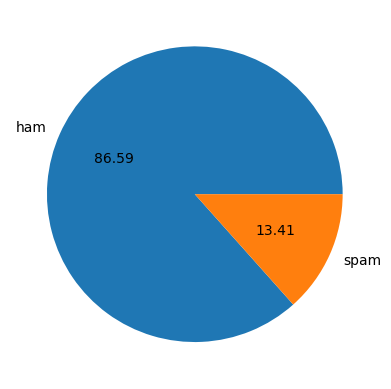

In [15]:
plt.pie(data['class'].value_counts(),labels=['ham','spam'], autopct='%0.2f')
plt.show()

<Axes: xlabel='class', ylabel='count'>

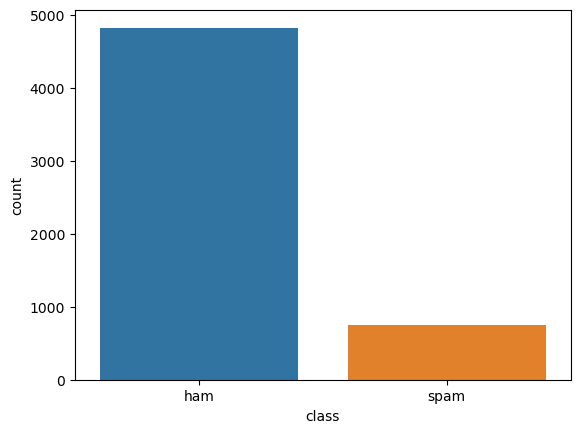

In [16]:
sns.countplot(x = 'class', data = data)

# 4.Text preprocessing

In [17]:
#1.Label encoding the target variable
from sklearn.preprocessing import LabelEncoder
label_Encoder = LabelEncoder()


In [18]:
data['class']=label_Encoder.fit_transform(data['class'])

In [19]:
data.head()

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


    2.remove un necessary characters
	3. lowering the text
	4.tokeniation  
	5.Stemming
	6.remove all the stop words
	7.join the splitted data

In [20]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
import regex as re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sritu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sritu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
data.head()

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
Transformed_text=[]
for i in range(0,5572):

    text=data["text"][i]
#a)remove un neccessary .,
    text=re.sub('[^a-zA-Z]',' ',text)
#b) lower case the text
    text=text.lower()
#c)split the text
    text=text.split()
#4.stemming
#5. remove stop words
    ps=PorterStemmer()
    text=[ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
#6.join the splitted data
    text=' '.join(text)
    data.iloc[i,1]=text

In [23]:
data

,class,text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though
...,...,...
5567,1,nd time tri contact u u pound prize claim easi...
5568,0,b go esplanad fr home
5569,0,piti mood suggest
5570,0,guy bitch act like interest buy someth els nex...


In [24]:
#8.split dependent and independent variables
X = data['text']
Y = data['class']

In [25]:
#9.split training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1, random_state = 2,stratify = Y)

# 5.Building word2vec model


In [26]:
#	1.Building the corpus
from tqdm import tqdm
words_in_sent = []
for i in tqdm(x_train):
  words_in_sent.append(i.split())

100%|██████████████████████████████████████████████████████████████████████████| 5014/5014 [00:00<00:00, 811477.09it/s]


In [27]:
print(words_in_sent)

[['yo', 'carlo', 'friend', 'alreadi', 'ask', 'work', 'weekend'], ['anyth', 'lor'], ['better', 'still', 'catch', 'let', 'ask', 'sell', 'lt', 'gt'], ['go', 'ok', 'na'], ['freemsg', 'month', 'unlimit', 'free', 'call', 'activ', 'smartcal', 'txt', 'call', 'subscriptn', 'gbp', 'wk', 'unlimit', 'call', 'help', 'stop', 'txt', 'stop', 'landlineonli'], ['place', 'man'], ['got', 'smaller', 'capac', 'one', 'quit', 'ex'], ['exact', 'intent'], ['today', 'song', 'dedic', 'day', 'song', 'u', 'dedic', 'send', 'ur', 'valuabl', 'frnd', 'first', 'rpli'], ['oh', 'unintent', 'bad', 'time', 'great', 'finger', 'train', 'play', 'along', 'give', 'fifteen', 'min', 'warn'], ['birthday', 'feb', 'lt', 'gt', 'da'], ['got', 'ur', 'favorit', 'oyster', 'n', 'got', 'favorit', 'sashimi', 'ok', 'lar', 'dun', 'say', 'alreadi', 'wait', 'ur', 'stomach', 'start', 'rumbl'], ['thanx', 'yup', 'come', 'back', 'sun', 'finish', 'dinner', 'go', 'back', 'hotel', 'time', 'fli', 'tog', 'exactli', 'mth', 'today', 'hope', 'haf', 'mani', 

In [28]:
from gensim.models import Word2Vec, FastText
word2vec_model = Word2Vec(sentences = words_in_sent,vector_size = 300,window = 5, workers = 2)

In [29]:
word2vec_model

### Words in Vocabulary

In [30]:
vocabulary = word2vec_model.wv.key_to_index
print(vocabulary)

{'u': 0, 'call': 1, 'go': 2, 'get': 3, 'ur': 4, 'gt': 5, 'lt': 6, 'come': 7, 'ok': 8, 'day': 9, 'free': 10, 'know': 11, 'love': 12, 'like': 13, 'time': 14, 'got': 15, 'good': 16, 'want': 17, 'text': 18, 'send': 19, 'txt': 20, 'need': 21, 'p': 22, 'one': 23, 'n': 24, 'take': 25, 'think': 26, 'today': 27, 'stop': 28, 'see': 29, 'r': 30, 'repli': 31, 'home': 32, 'k': 33, 'lor': 34, 'still': 35, 'tell': 36, 'sorri': 37, 'mobil': 38, 'da': 39, 'back': 40, 'make': 41, 'phone': 42, 'week': 43, 'say': 44, 'min': 45, 'dont': 46, 'hi': 47, 'new': 48, 'msg': 49, 'pl': 50, 'ask': 51, 'later': 52, 'pleas': 53, 'co': 54, 'meet': 55, 'miss': 56, 'hope': 57, 'work': 58, 'dear': 59, 'messag': 60, 'happi': 61, 'c': 62, 'night': 63, 'thing': 64, 'wait': 65, 'well': 66, 'great': 67, 'give': 68, 'tri': 69, 'oh': 70, 'wat': 71, 'much': 72, 'hey': 73, 'b': 74, 'thank': 75, 'claim': 76, 'number': 77, 'friend': 78, 'way': 79, 'ye': 80, 'feel': 81, 'alreadi': 82, 'e': 83, 'let': 84, 'www': 85, 'prize': 86, 'ton

In [31]:
len(vocabulary)

1449

In [32]:
v1 = word2vec_model.wv['around']

In [33]:
v1

array([ 2.27688625e-02,  2.09163502e-01,  4.66969199e-02,  1.57683671e-01,
        1.56088470e-04, -2.57486045e-01,  1.23599432e-01,  4.06909615e-01,
        5.37890270e-02, -4.74674031e-02, -2.75579244e-02, -1.64963201e-01,
        9.01351348e-02, -5.49549647e-02, -1.31389245e-01, -8.16860795e-02,
        7.35819861e-02, -2.07894538e-02,  1.31559238e-01,  1.45884538e-02,
       -1.66301653e-01,  1.14235338e-02,  1.78153545e-01, -1.37082161e-03,
        2.42642760e-01,  4.19007242e-02, -2.05623865e-01,  3.53906676e-03,
       -1.71760216e-01, -1.64791167e-01,  2.74547990e-02, -1.13072239e-01,
        3.67751494e-02, -1.20997615e-02, -4.41664271e-02,  3.33916359e-02,
        6.03187643e-02, -2.25045323e-01, -1.07750855e-02, -1.41964396e-02,
       -1.46128595e-01, -2.97799371e-02,  1.79540887e-02, -1.50760636e-01,
        1.32200226e-01,  1.63753971e-01,  4.49829809e-02,  6.08657487e-02,
       -3.78712825e-02,  2.09341615e-01,  1.45885283e-02,  2.90492852e-03,
       -1.23911217e-01,  

# Prediction

In [34]:
sim_words = word2vec_model.wv.most_similar('free')

In [35]:
sim_words

[('mobil', 0.9998365044593811),
 ('repli', 0.9998246431350708),
 ('txt', 0.9998234510421753),
 ('text', 0.9998077750205994),
 ('nokia', 0.999806821346283),
 ('tone', 0.9998001456260681),
 ('latest', 0.99978107213974),
 ('phone', 0.9997720718383789),
 ('week', 0.9997645020484924),
 ('call', 0.999754786491394)]

# Visualizing Email Word Embeddings

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


2
             x         y
u     2.450377 -0.032266
call  2.611189  0.056954
go    2.830150 -0.021894
get   2.774075  0.003046
ur    2.784852  0.007902


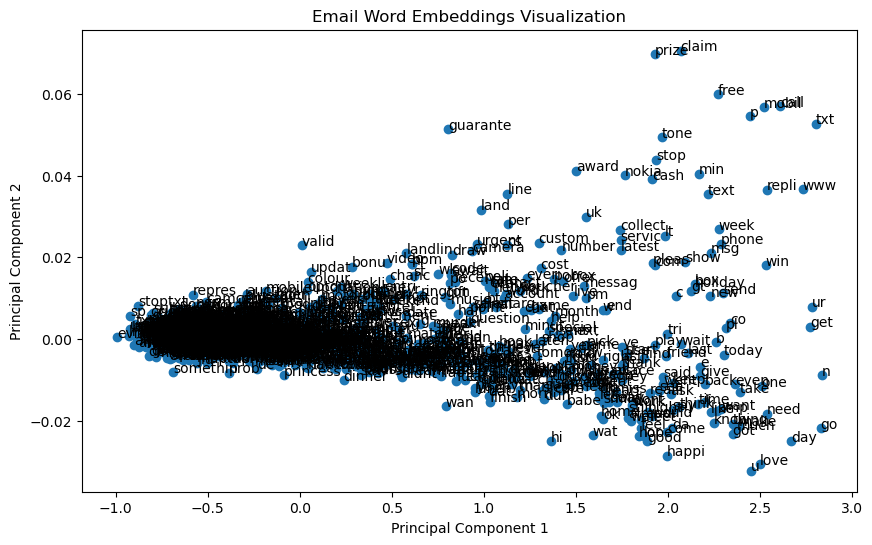

In [46]:
# Function to plot word embeddings
def plot_word_embeddings(word2vec_model):
    words = word2vec_model.wv.index_to_key
    X = word2vec_model.wv[words]
    # Reduce dimensionality to 2D using PCA
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    # Create a DataFrame for plotting
    df = pd.DataFrame(result, index=words, columns=['x', 'y'])
    print(df.head())
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['x'], df['y'])
    for word, pos in df.iterrows():
        plt.annotate(word, pos)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Email Word Embeddings Visualization')
    plt.show()

plot_word_embeddings(word2vec_model)

In [45]:
print(result)

NameError: name 'result' is not defined